In [134]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [135]:
data = pd.read_csv('kc_house_data.csv')

data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [136]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [137]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


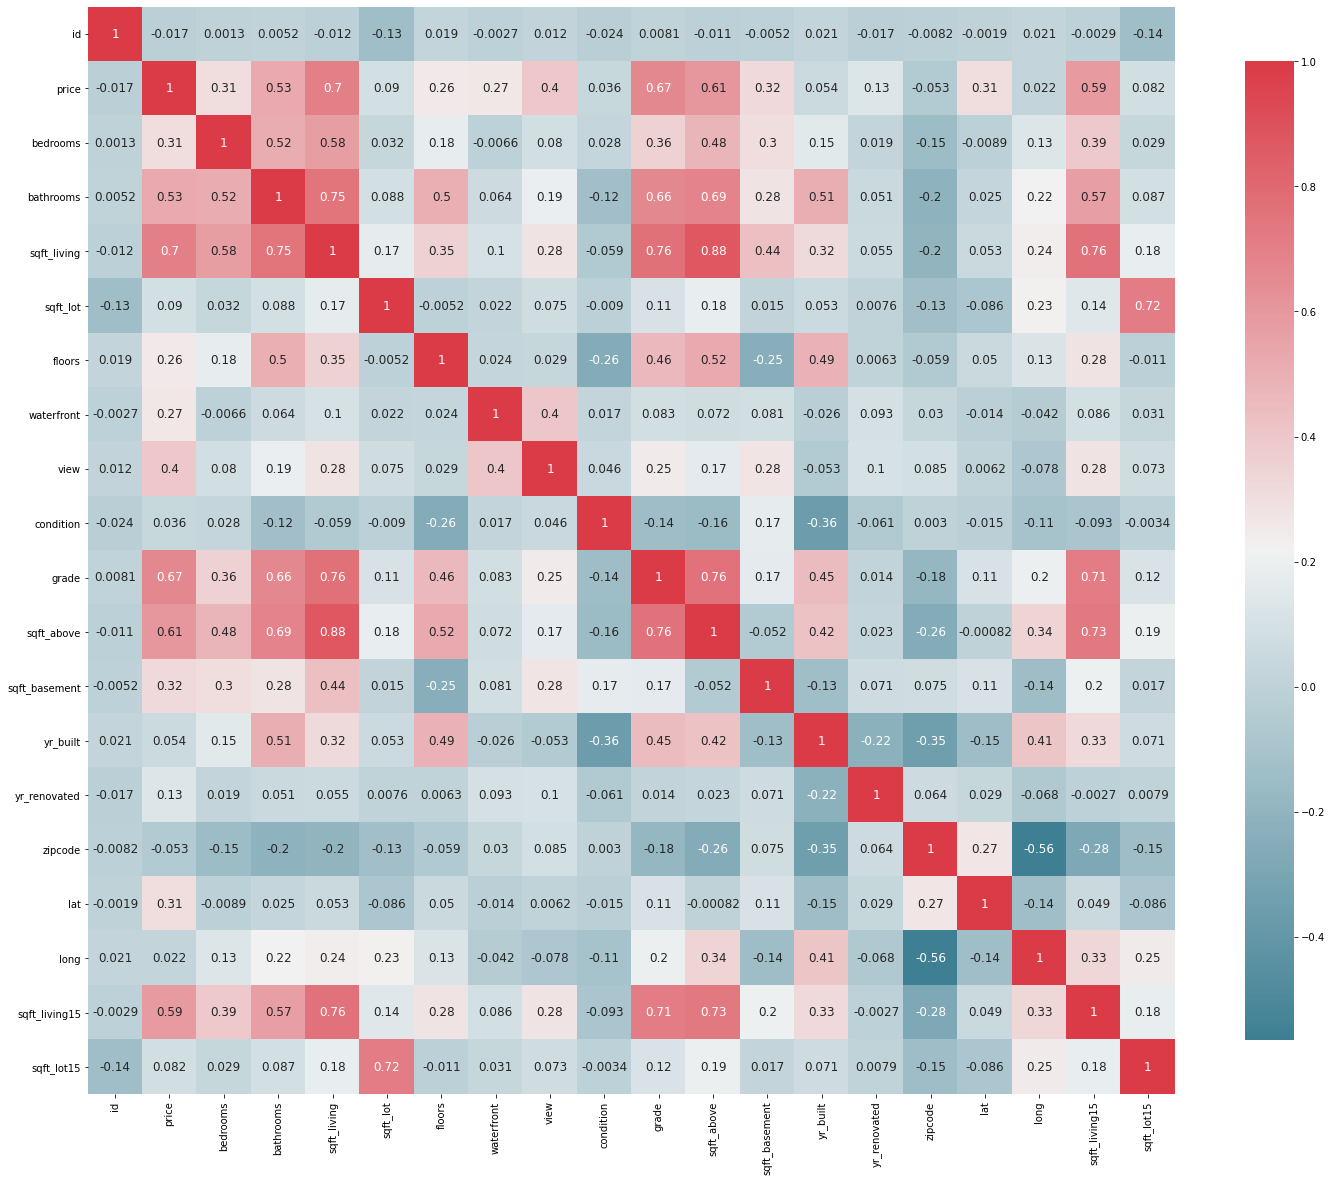

In [138]:
def plot_correlation_map( df ):

    corr = df.corr()

    s , ax = plt.subplots( figsize =( 25 , 20 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 12 }

        )
plot_correlation_map(data)

In [139]:
data.corr()['price'].sort_values()

zipcode         -0.053203
id              -0.016762
long             0.021626
condition        0.036362
yr_built         0.054012
sqft_lot15       0.082447
sqft_lot         0.089661
yr_renovated     0.126434
floors           0.256794
waterfront       0.266369
lat              0.307003
bedrooms         0.308350
sqft_basement    0.323816
view             0.397293
bathrooms        0.525138
sqft_living15    0.585379
sqft_above       0.605567
grade            0.667434
sqft_living      0.702035
price            1.000000
Name: price, dtype: float64

In [140]:
data.drop(['id','zipcode','date',              
'long',            
'condition',        
'yr_built',        
'sqft_lot15',      
'sqft_lot',        
'yr_renovated',     
'floors',        
'waterfront',       
'lat',              
'bedrooms',         
'sqft_basement',    
'view' ], axis = 1, inplace = True)


In [141]:
columns =data.columns

In [142]:
#visualisation of some features

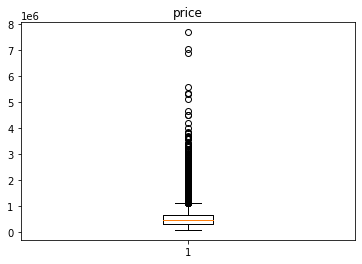

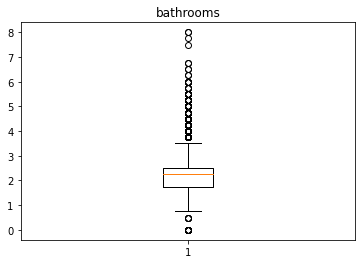

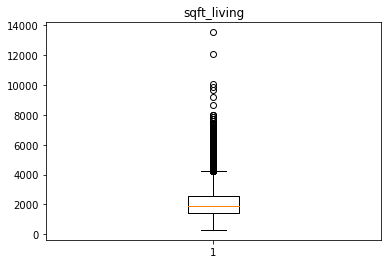

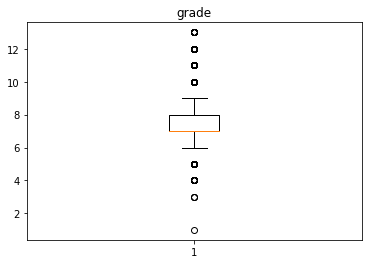

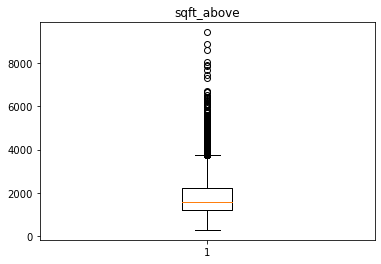

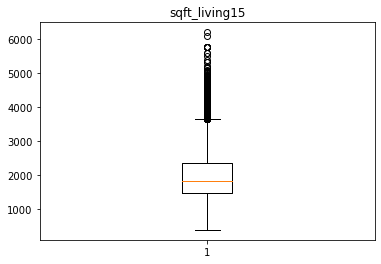

In [143]:
for i in columns:
    plt.boxplot(data[i])
    plt.title(i)
    plt.show()

# correlation between price and some features

In [144]:
data[["sqft_living", "price"]].groupby(["sqft_living"], as_index=True).mean()

,price
sqft_living,
290,142000.0
370,276000.0
380,245000.0
384,265000.0
390,236500.0
...,...
9640,4668000.0
9890,6885000.0
10040,7062500.0


In [145]:
data[["grade", "price"]].groupby(["grade"], as_index=True).mean()

,price
grade,
1,1.420000e+05
3,2.056667e+05
4,2.143810e+05
5,2.485240e+05
6,3.019196e+05
7,4.025903e+05
8,5.428528e+05
9,7.735132e+05
10,1.071771e+06


In [146]:
data[["sqft_above", "price"]].groupby(["sqft_above"], as_index=True).mean()

,price
sqft_above,
290,142000.0
370,276000.0
380,245000.0
384,265000.0
390,236500.0
...,...
7880,2415000.0
8020,3300000.0
8570,7700000.0


In [147]:
data[["sqft_living15", "price"]].groupby(["sqft_living15"], as_index=True).mean()
   


,price
sqft_living15,
399,5.360000e+05
460,3.177500e+05
620,2.600000e+05
670,3.140000e+05
690,2.420000e+05
...,...
5600,1.250000e+06
5610,1.950000e+06
5790,1.600333e+06


In [148]:
data[["bathrooms", "price"]].groupby(["bathrooms"], as_index=True).mean()

,price
bathrooms,
0.00,4.481600e+05
0.50,2.373750e+05
0.75,2.945209e+05
1.00,3.470412e+05
1.25,6.212167e+05
1.50,4.093222e+05
1.75,4.548961e+05
2.00,4.578897e+05
2.25,5.336768e+05


# LINEAR REGRESSION

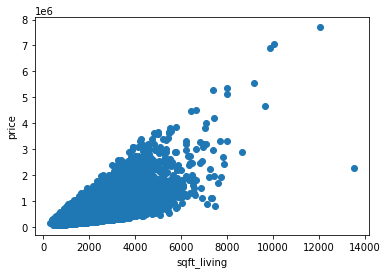

In [149]:
#dessiner le nuage de points du prix en fonction du sqft_living
plt.scatter(data['sqft_living'],data['price'])
plt.xlabel('sqft_living')
plt.ylabel('price')

plt.show()

In [241]:
x = data[['sqft_living']]
y = data['price']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=30)

In [242]:
#definir le modele
LR = LinearRegression()

In [243]:
#entrainer le model
LR.fit(x_train,y_train)

LinearRegression()

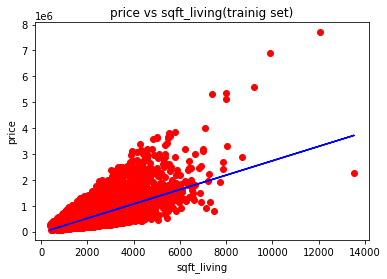

In [244]:
#le nuage de points des variables d'entrainement
plt.scatter(x_train,y_train,color = 'red')
plt.plot(x_train,LR.predict(x_train),color = 'blue')
plt.title('price vs sqft_living(trainig set)')
plt.xlabel('sqft_living')
plt.ylabel('price')
plt.show()

In [245]:
#tester le model
Y_pred_LR = LR.predict(x_test)
print(Y_pred_LR)

[531491.79579841 623126.69427243 623126.69427243 ... 332394.15275032
 537045.42600896 434303.26711385]


In [246]:
#la difference entre l'original et le test
diff_LR = y_test - Y_pred_LR

In [247]:
res_df = pd.concat([pd.Series(Y_pred_LR),pd.Series(y_test),pd.Series(diff_LR)],axis = 1)
res_df.columns=['prediction','original','deffrence']

In [248]:
res_df

,prediction,original,deffrence
0,531491.795798,NaN,NaN
1,623126.694272,NaN,NaN
2,623126.694272,NaN,NaN
3,678107.633357,NaN,NaN
4,637010.769799,NaN,NaN
...,...,...,...
21596,NaN,679950.0,-281948.137116
21600,NaN,1537000.0,333518.948725
21602,NaN,224000.0,-154766.965008
21604,NaN,429000.0,53009.850097


In [249]:
#calculer la performance du model MSE
print(np.mean((diff_LR)**2))

70507668197.44699


In [250]:
#la performance du model en utilisant la grandeur de sklearn
print(mean_squared_error(y_test,Y_pred_LR))

70507668197.4471


In [251]:
#predire le prix en fonction du sqft_living
LR.predict([[2546]])

array([669221.82501996])

In [252]:
print(r2_score(y_test,Y_pred_LR))

0.5069069519070434


# MULTI_LINEAR REGRESSION

In [258]:
data = pd.read_csv('kc_house_data.csv')

X = data[['sqft_living','bathrooms','sqft_living15','sqft_above','grade']]
Y = data['price']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=30)

MLR = LinearRegression()

MLR.fit(X_train,Y_train)

LinearRegression()

In [259]:
Y_pred_MLR = MLR.predict(X_test)
print(Y_pred_MLR)

[522881.35080362 606155.20211921 658579.50348802 ... 303227.34460586
 422622.73151117 378343.50280095]


In [260]:
diff_MLR = Y_test - Y_pred_MLR

In [261]:
MLR_df = pd.concat([pd.Series(Y_pred_MLR),pd.Series(Y_test),pd.Series(diff_MLR)],axis = 1)
MLR_df.columns=['prediction','original','deffrence']
MLR_df

,prediction,original,deffrence
0,522881.350804,NaN,NaN
1,606155.202119,NaN,NaN
2,658579.503488,NaN,NaN
3,748365.393948,NaN,NaN
4,576866.099855,NaN,NaN
...,...,...,...
21596,NaN,679950.0,-247458.671667
21600,NaN,1537000.0,312498.220853
21602,NaN,224000.0,-9100.942123
21604,NaN,429000.0,-16835.703649


In [262]:
print(r2_score(Y_test,Y_pred_MLR))

0.5517541329605458


In [274]:


x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=30)  #splitting data
lg=LinearRegression()
poly=PolynomialFeatures(degree=3)

x_train_fit = poly.fit_transform(x_train) #transforming our input data
lg.fit(x_train_fit, y_train)
x_test_ = poly.fit_transform(x_test)
predicted = lg.predict(x_test_)


print("R squared: ", r2_score(y_test,predicted))

R squared:  0.6309172532992562
